In [1]:
import pandas as pd

In [2]:
energy_index = pd.read_csv("../data/Global price of Energy index.csv")

In [5]:
energy_index.DATE = pd.to_datetime(energy_index.DATE)

In [6]:
energy_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        370 non-null    datetime64[ns]
 1   PNRGINDEXM  370 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


In [18]:
energy_index

,DATE,PNRGINDEXM,Monthly Change
0,1992-01-01,44.452235,NaN
1,1992-02-01,44.012857,-0.009884
2,1992-03-01,43.828585,-0.004187
3,1992-04-01,46.155698,0.053096
4,1992-05-01,48.205262,0.044405
...,...,...,...
365,2022-06-01,328.123480,0.069939
366,2022-07-01,343.809997,0.047807
367,2022-08-01,376.412083,0.094826
368,2022-09-01,330.149586,-0.122904


In [8]:
energy_index["Monthly Change"] = energy_index["PNRGINDEXM"].pct_change()

<AxesSubplot: ylabel='Density'>

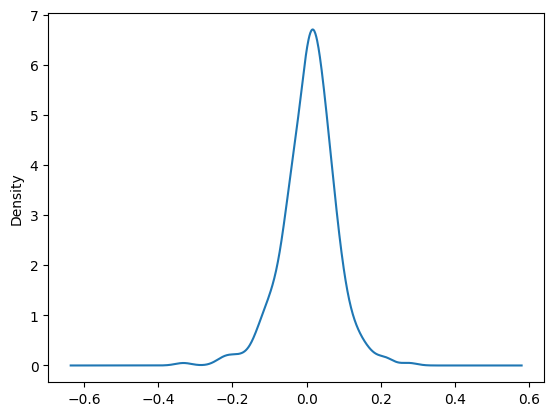

In [17]:
energy_index["Monthly Change"].plot(kind="kde")

In [38]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

data = energy_index["Monthly Change"].dropna().to_numpy().reshape(-1,1)
data.shape

kde = KernelDensity(kernel="gaussian", bandwidth=0.01).fit(data)

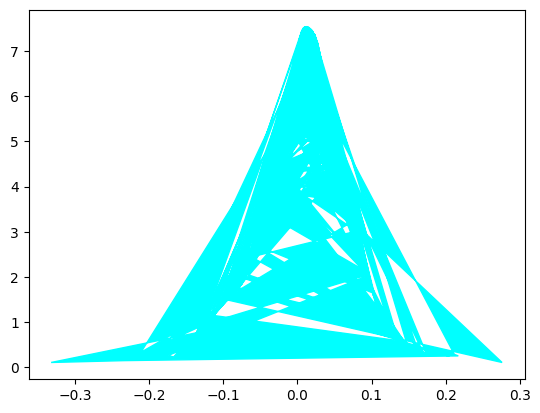

In [39]:
import numpy as np
log_dens = kde.score_samples(data)
plt.fill(data, np.exp(log_dens), c="cyan")

In [40]:
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

#Calculate mean and Standard deviation.
mean = np.mean(energy_index["Monthly Change"])
sd = np.std(energy_index["Monthly Change"])